# 1. How has price per piece changed across release years?

In [5]:
from google.colab import files
uploaded = files.upload()

Saving lego_population.csv to lego_population (1).csv


=== SIMPLE LEGO PRICE PER PIECE ANALYSIS ===

Yearly Average Price per Piece:
 year  avg_price_per_piece
 2018             0.225061
 2019             0.749453
 2020             0.659702

Summary:
First year (2018): $0.225 per piece
Last year (2020): $0.660 per piece
Change: $0.435 per piece
Percentage change: 193.1%


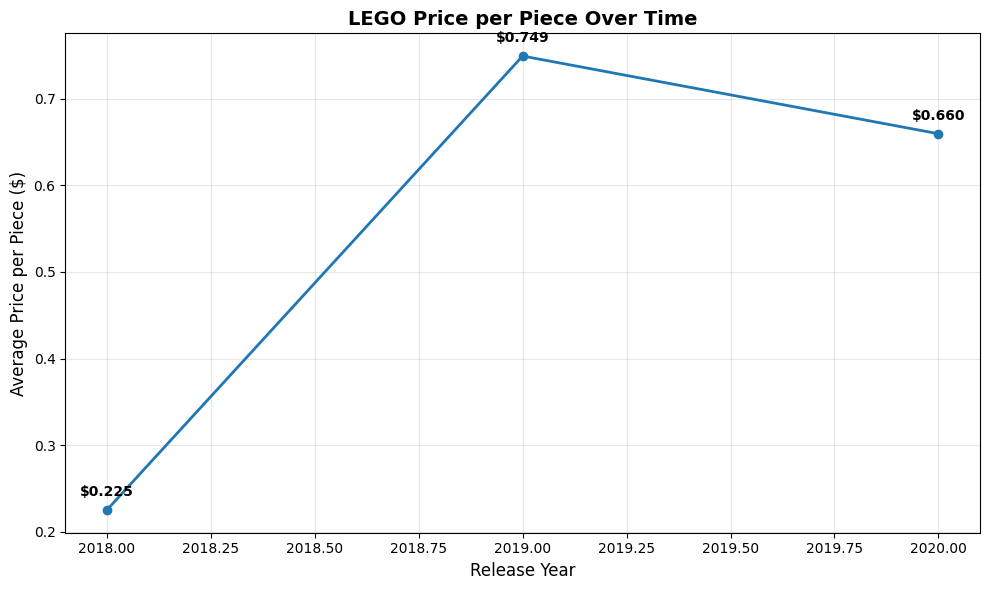

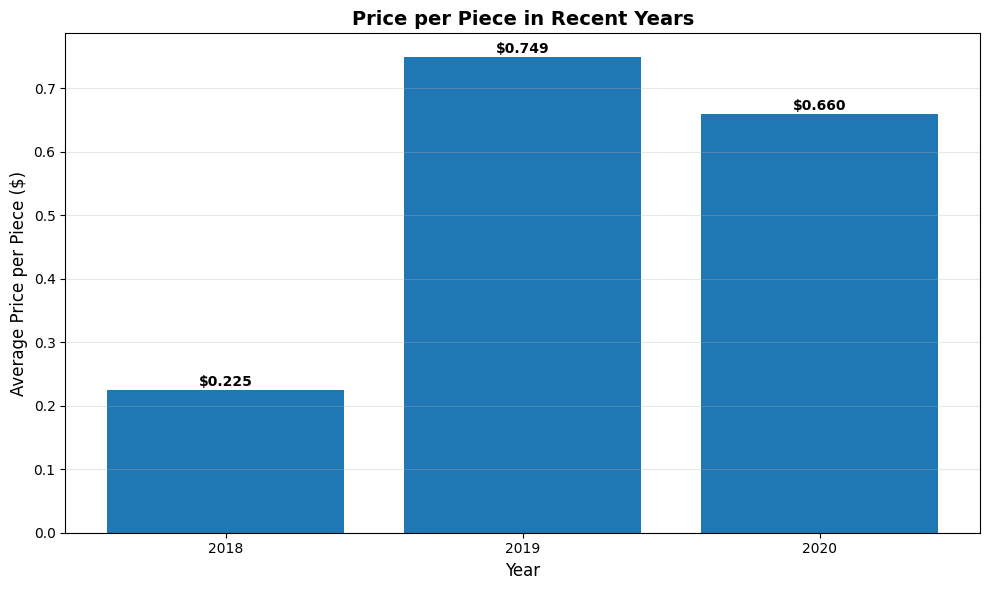


Top 5 Most Expensive Years (by average price per piece):
 year  avg_price_per_piece
 2019             0.749453
 2020             0.659702
 2018             0.225061

Bottom 5 Least Expensive Years (by average price per piece):
 year  avg_price_per_piece
 2018             0.225061
 2020             0.659702
 2019             0.749453

Overall average price per piece (all years): $0.544
Number of sets analyzed: 1065
Years covered: 2018 to 2020


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('lego_population.csv')

# Clean the data - keep only rows with price, pieces, and year
df_clean = df.dropna(subset=['year', 'price', 'pieces'])
df_clean = df_clean[(df_clean['price'] > 0) & (df_clean['pieces'] > 0)]

# Convert year to integer
df_clean['year'] = df_clean['year'].astype(int)

# Calculate price per piece
df_clean['price_per_piece'] = df_clean['price'] / df_clean['pieces']

# Group by year and calculate average price per piece
yearly_stats = df_clean.groupby('year')['price_per_piece'].mean().reset_index()
yearly_stats.columns = ['year', 'avg_price_per_piece']

# Sort by year
yearly_stats = yearly_stats.sort_values('year')

print("=== SIMPLE LEGO PRICE PER PIECE ANALYSIS ===")
print("="*50)
print("\nYearly Average Price per Piece:")
print(yearly_stats.to_string(index=False))

# Find first and last year with data
first_year = yearly_stats['year'].min()
last_year = yearly_stats['year'].max()
first_price = yearly_stats[yearly_stats['year'] == first_year]['avg_price_per_piece'].values[0]
last_price = yearly_stats[yearly_stats['year'] == last_year]['avg_price_per_piece'].values[0]

print(f"\nSummary:")
print(f"First year ({first_year}): ${first_price:.3f} per piece")
print(f"Last year ({last_year}): ${last_price:.3f} per piece")
print(f"Change: ${(last_price - first_price):.3f} per piece")
print(f"Percentage change: {((last_price - first_price)/first_price)*100:.1f}%")

# Create a simple line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['year'], yearly_stats['avg_price_per_piece'],
         marker='o', linewidth=2, markersize=6)
plt.title('LEGO Price per Piece Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Price per Piece ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add value labels for first, middle, and last points
years = yearly_stats['year'].tolist()
prices = yearly_stats['avg_price_per_piece'].tolist()

for i in [0, len(years)//2, -1]:
    plt.annotate(f'${prices[i]:.3f}',
                xy=(years[i], prices[i]),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontweight='bold')

plt.show()

# Create a simple bar chart for the last 5 years
recent_years = yearly_stats.tail(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(recent_years['year'].astype(str), recent_years['avg_price_per_piece'])
plt.title('Price per Piece in Recent Years', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price per Piece ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'${height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Show the top 5 most expensive years by price per piece
print("\nTop 5 Most Expensive Years (by average price per piece):")
top_5 = yearly_stats.sort_values('avg_price_per_piece', ascending=False).head(5)
print(top_5.to_string(index=False))

# Show the bottom 5 least expensive years
print("\nBottom 5 Least Expensive Years (by average price per piece):")
bottom_5 = yearly_stats.sort_values('avg_price_per_piece').head(5)
print(bottom_5.to_string(index=False))

# Calculate overall average
overall_avg = df_clean['price_per_piece'].mean()
print(f"\nOverall average price per piece (all years): ${overall_avg:.3f}")
print(f"Number of sets analyzed: {len(df_clean)}")
print(f"Years covered: {first_year} to {last_year}")


# 2. How has the average price of sets changed over production years? i.e., are newer sets more expensive (or have more pieces) than older ones?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lego_population.csv to lego_population (3).csv


In [ ]:
import pandas as pd

filename = list(uploaded.keys())[0]   # gets your file name automatically
df = pd.read_csv(filename)


In [ ]:
df_clean = df.dropna(subset=["price", "year"])
df_clean.head()

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
0,41916,Extra Dots - Series 2,DOTS,109.0,3.99,3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,3.99,3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Small
2,11006,Creative Blue Bricks,Classic,52.0,4.99,4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Small
3,11007,Creative Green Bricks,Classic,60.0,4.99,4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,4.99,4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Small


In [ ]:
price_by_year = df_clean.groupby("year")["price"].mean().reset_index()
price_by_year.head()

,year,price
0,2018,42.882238
1,2019,48.435906
2,2020,47.727405


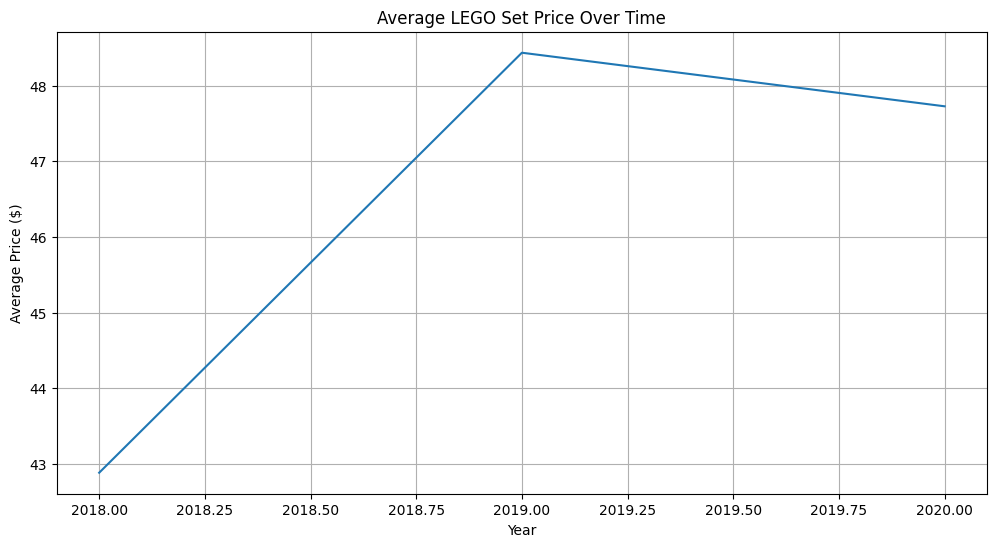

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(price_by_year["year"], price_by_year["price"])
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.title("Average LEGO Set Price Over Time")
plt.grid(True)
plt.show()

# 3. Which LEGO themes have the lowest average price per piece?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lego_population.csv to lego_population (1).csv


Dataset Info:
Shape: (1304, 14)
Columns: ['item_number', 'set_name', 'theme', 'pieces', 'price', 'amazon_price', 'year', 'ages', 'pages', 'minifigures', 'packaging', 'weight', 'unique_pieces', 'size']

First few rows:
   item_number                set_name    theme  pieces  price  amazon_price  \
0        41916   Extra Dots - Series 2     DOTS   109.0   3.99          3.44   
1        41908   Extra Dots - Series 1     DOTS   109.0   3.99          3.99   
2        11006    Creative Blue Bricks  Classic    52.0   4.99          4.93   
3        11007   Creative Green Bricks  Classic    60.0   4.99          4.93   
4        41901  Funky Animals Bracelet     DOTS    33.0   4.99          4.99   

   year     ages  pages  minifigures  packaging weight  unique_pieces   size  
0  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
1  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
2  2020  Ages_4+   37.0          NaN        Box    NaN          

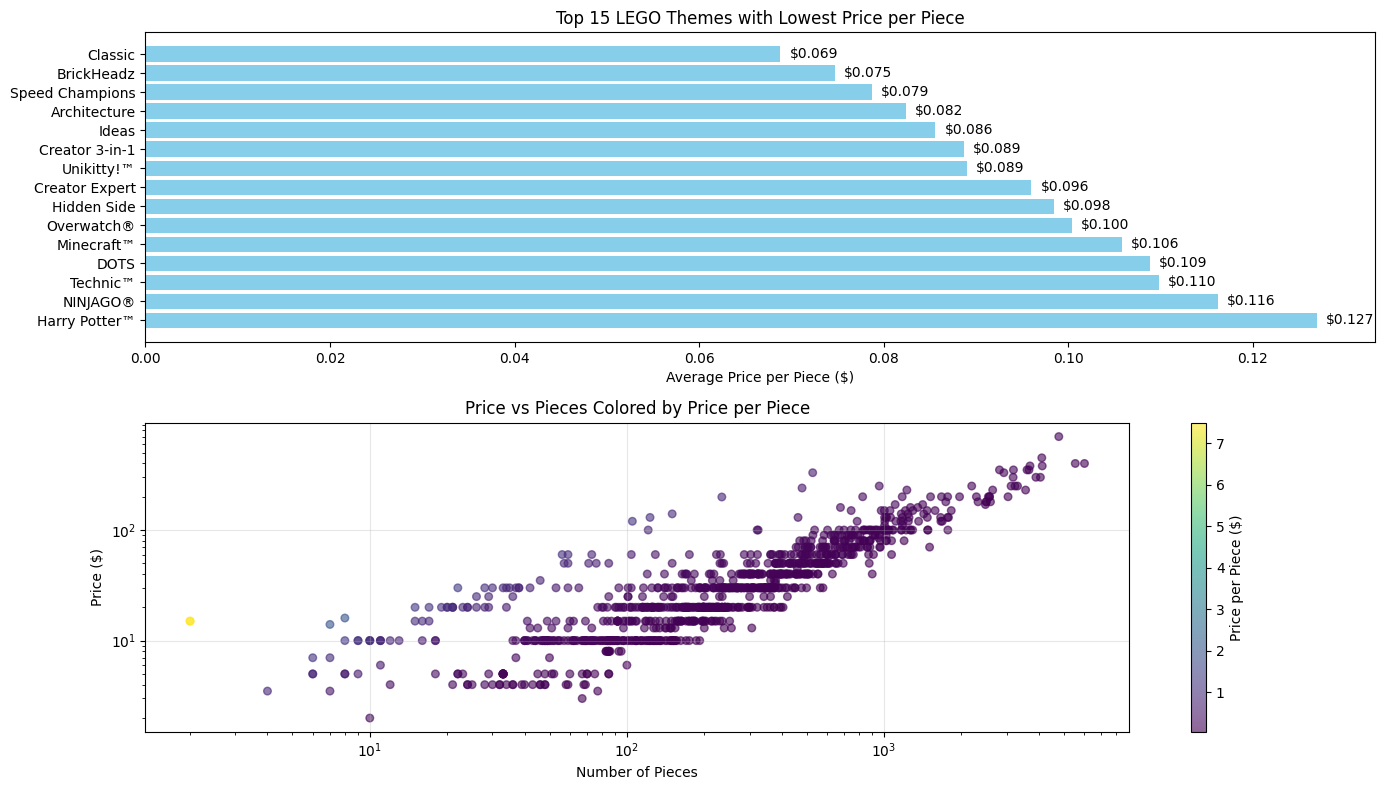


OVERALL STATISTICS:
Overall average price per piece: $0.1913
Overall median price per piece: $0.1111
Standard deviation: $0.3871
Minimum price per piece: $0.0425
Maximum price per piece: $7.4950

VALUE CATEGORIES:
High Value (lowest 25%): < $0.0984 per piece
Medium Value (middle 50%): $0.0984 - $0.1762 per piece
Lower Value (highest 25%): > $0.1762 per piece

THEMES BY VALUE CATEGORY:
--------------------------------------------------------------------------------
HIGH VALUE THEMES (Most economical):
  - Classic
  - BrickHeadz
  - Speed Champions
  - Architecture
  - Ideas
  - Creator 3-in-1
  - Unikitty!™
  - Creator Expert

MEDIUM VALUE THEMES:
  - Hidden Side
  - Overwatch®
  - Minecraft™
  - DOTS
  - Technic™
  - NINJAGO®
  - Harry Potter™
  - Friends
  - Marvel
  - Star Wars™
  - Trolls World Tour
  - Xtra
  - THE LEGO® MOVIE 2™
  - Monkie Kid
  - LEGO® Frozen 2
  - DC
  - Batman™

LOWER VALUE THEMES (Least economical):
  - Juniors
  - Jurassic World™
  - City
  - LEGO® Super Mar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/lego_population.csv') # Corrected file path

# Display basic info about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())
print("\n" + "="*80)

# Clean and prepare the data
# Remove rows where price or pieces are missing or 0
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['price', 'pieces'])
df_clean = df_clean[(df_clean['price'] > 0) & (df_clean['pieces'] > 0)]

# Calculate price per piece
df_clean['price_per_piece'] = df_clean['price'] / df_clean['pieces']

# Filter out outliers (e.g., sets with extremely high or low price per piece)
# Remove top and bottom 1% to avoid extreme values skewing the results
lower_bound = df_clean['price_per_piece'].quantile(0.01)
upper_bound = df_clean['price_per_piece'].quantile(0.99)
df_clean = df_clean[(df_clean['price_per_piece'] >= lower_bound) &
                    (df_clean['price_per_piece'] <= upper_bound)]

# Group by theme and calculate statistics
theme_stats = df_clean.groupby('theme').agg({
    'price_per_piece': ['mean', 'median', 'std', 'count'],
    'price': 'mean',
    'pieces': 'mean'
}).round(4)

# Rename columns for clarity
theme_stats.columns = ['avg_price_per_piece', 'median_price_per_piece',
                       'std_price_per_piece', 'set_count',
                       'avg_price', 'avg_pieces']

# Filter themes with sufficient data (at least 5 sets)
theme_stats = theme_stats[theme_stats['set_count'] >= 5]

# Sort by average price per piece (ascending - lowest first)
theme_stats_sorted = theme_stats.sort_values('avg_price_per_piece')

print("\nLEGO Themes with Lowest Average Price Per Piece:")
print("="*80)
print(f"Total themes analyzed: {len(theme_stats_sorted)}")
print(f"Total sets analyzed: {int(theme_stats_sorted['set_count'].sum())}")
print("\nTop 20 themes with lowest price per piece:")
print(theme_stats_sorted[['avg_price_per_piece', 'set_count', 'avg_price', 'avg_pieces']].head(20))
print("\n" + "="*80)

# Display full sorted list
print("\nComplete list of themes sorted by price per piece (lowest to highest):")
for idx, (theme, row) in enumerate(theme_stats_sorted.iterrows(), 1):
    print(f"{idx:3d}. {theme:30s} | Price/Piece: ${row['avg_price_per_piece']:.4f} | "
          f"Sets: {int(row['set_count']):3d} | Avg Price: ${row['avg_price']:.2f} | "
          f"Avg Pieces: {row['avg_pieces']:.0f}")

# Create visualizations
plt.figure(figsize=(14, 8))

# Plot 1: Top 15 themes with lowest price per piece
top_15 = theme_stats_sorted.head(15)
plt.subplot(2, 1, 1)
bars = plt.barh(top_15.index, top_15['avg_price_per_piece'], color='skyblue')
plt.xlabel('Average Price per Piece ($)')
plt.title('Top 15 LEGO Themes with Lowest Price per Piece')
plt.gca().invert_yaxis()  # Highest value at top

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'${width:.3f}', ha='left', va='center')

# Plot 2: Scatter plot of price vs pieces colored by price per piece
plt.subplot(2, 1, 2)
scatter = plt.scatter(df_clean['pieces'], df_clean['price'],
                      c=df_clean['price_per_piece'],
                      cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='Price per Piece ($)')
plt.xlabel('Number of Pieces')
plt.ylabel('Price ($)')
plt.title('Price vs Pieces Colored by Price per Piece')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/lego_price_per_piece_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Additional analysis: Calculate overall statistics
print("\n" + "="*80)
print("OVERALL STATISTICS:")
print("="*80)
print(f"Overall average price per piece: ${df_clean['price_per_piece'].mean():.4f}")
print(f"Overall median price per piece: ${df_clean['price_per_piece'].median():.4f}")
print(f"Standard deviation: ${df_clean['price_per_piece'].std():.4f}")
print(f"Minimum price per piece: ${df_clean['price_per_piece'].min():.4f}")
print(f"Maximum price per piece: ${df_clean['price_per_piece'].max():.4f}")

# Calculate value ranges
low_value = theme_stats_sorted['avg_price_per_piece'].quantile(0.25)
high_value = theme_stats_sorted['avg_price_per_piece'].quantile(0.75)

print("\nVALUE CATEGORIES:")
print(f"High Value (lowest 25%): < ${low_value:.4f} per piece")
print(f"Medium Value (middle 50%): ${low_value:.4f} - ${high_value:.4f} per piece")
print(f"Lower Value (highest 25%): > ${high_value:.4f} per piece")

# Show themes in each category
print("\nTHEMES BY VALUE CATEGORY:")
print("-" * 80)
print("HIGH VALUE THEMES (Most economical):")
high_value_themes = theme_stats_sorted[theme_stats_sorted['avg_price_per_piece'] < low_value]
for theme in high_value_themes.index:
    print(f"  - {theme}")

print("\nMEDIUM VALUE THEMES:")
medium_value_themes = theme_stats_sorted[(theme_stats_sorted['avg_price_per_piece'] >= low_value) &
                                         (theme_stats_sorted['avg_price_per_piece'] <= high_value)]
for theme in medium_value_themes.index:
    print(f"  - {theme}")

print("\nLOWER VALUE THEMES (Least economical):")
lower_value_themes = theme_stats_sorted[theme_stats_sorted['avg_price_per_piece'] > high_value]
for theme in lower_value_themes.index:
    print(f"  - {theme}")

# Save results to CSV
theme_stats_sorted.to_csv('/content/lego_theme_price_per_piece_analysis.csv')
print("\n" + "="*80)
print(f"Analysis complete! Results saved to:")
print("1. /content/lego_theme_price_per_piece_analysis.csv")
print("2. /content/lego_price_per_piece_analysis.png")

# 4. Do sets with more pieces cost less per piece?

In [ ]:
# Step 1: Upload the file (run this cell first)
from google.colab import files
uploaded = files.upload()  # Click "Choose Files" and select your lego_population.csv

Saving lego_population.csv to lego_population (4).csv


Original Dataset Shape: (1304, 14)

First 5 Rows:
   item_number                set_name    theme  pieces  price  amazon_price  \
0        41916   Extra Dots - Series 2     DOTS   109.0   3.99          3.44   
1        41908   Extra Dots - Series 1     DOTS   109.0   3.99          3.99   
2        11006    Creative Blue Bricks  Classic    52.0   4.99          4.93   
3        11007   Creative Green Bricks  Classic    60.0   4.99          4.93   
4        41901  Funky Animals Bracelet     DOTS    33.0   4.99          4.99   

   year     ages  pages  minifigures  packaging weight  unique_pieces   size  
0  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
1  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
2  2020  Ages_4+   37.0          NaN        Box    NaN           28.0  Small  
3  2020  Ages_4+   37.0          NaN        Box    NaN           36.0  Small  
4  2020  Ages_6+    NaN          NaN  Foil pack    NaN           10.0  Sma

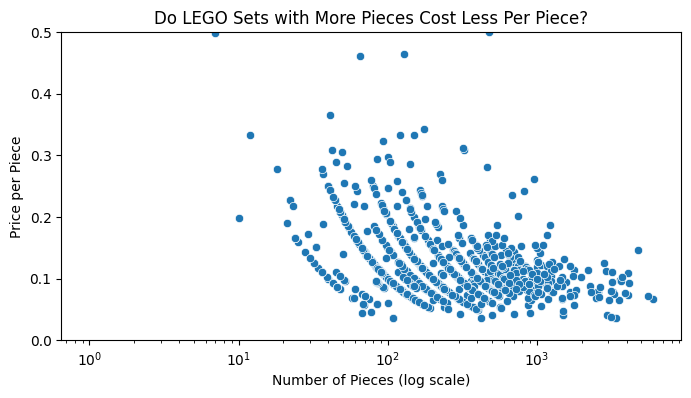

This plot shows individual LEGO sets. With the logarithmic x-axis, the distribution of sets across different piece counts is clearer, especially for smaller sets. The y-axis limit highlights that most sets have a price per piece below $0.50. You can still observe the general tendency for price per piece to decrease as the number of pieces increases.


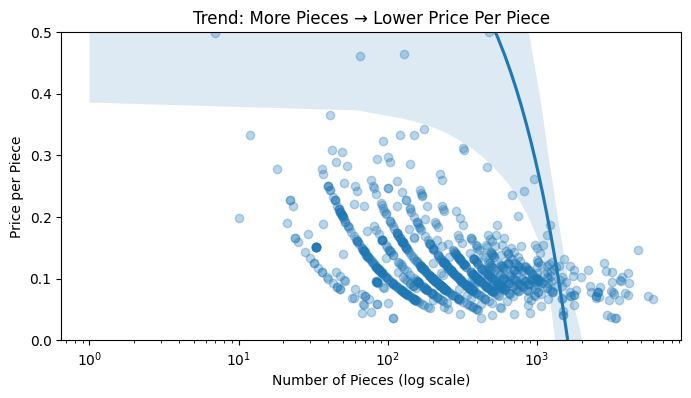

This plot uses a regression line to visually represent the overall trend. The downward slope of the line confirms that, on average, LEGO sets with more pieces tend to have a lower price per piece. The logarithmic x-axis helps to show this trend more evenly across the wide range of piece counts, emphasizing the economies of scale.


In [ ]:

# Step 2: Load & inspect the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the uploaded filename (automatically detects the CSV)
filename = next(iter(uploaded.keys()))
df = pd.read_csv(filename)

# Inspect data
print("Original Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# Load dataset
lego = pd.read_csv("/content/lego_population.csv")

# Preview data
lego.head()

# Keep only relevant columns for this question
df = lego[['item_number', 'set_name', 'theme', 'pieces', 'price', 'year', 'size']].copy()

# Remove missing values for pieces and price
df = df.dropna(subset=['pieces', 'price'])

# Create price-per-piece column
df['price_per_piece'] = df['price'] / df['pieces']

# --- SUMMARY STATS ---
summary = df[['pieces', 'price', 'price_per_piece']].describe()
summary

# --- CORRELATION ---
corr = df['pieces'].corr(df['price_per_piece'])
corr

# --- SCATTERPLOT ---
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='pieces', y='price_per_piece', alpha=1.0)
plt.title("Do LEGO Sets with More Pieces Cost Less Per Piece?")
plt.xlabel("Number of Pieces (log scale)")
plt.ylabel("Price per Piece")
plt.xscale('log') # Apply logarithmic scale to x-axis
plt.ylim(0, 0.5) # Set y-axis limit to 0-0.5
plt.show()
print("This plot shows individual LEGO sets. With the logarithmic x-axis, the distribution of sets across different piece counts is clearer, especially for smaller sets. The y-axis limit highlights that most sets have a price per piece below $0.50. You can still observe the general tendency for price per piece to decrease as the number of pieces increases.")

# --- TREND LINE ---
plt.figure(figsize=(8,4))
sns.regplot(data=df, x='pieces', y='price_per_piece', scatter_kws={'alpha':0.3})
plt.title("Trend: More Pieces → Lower Price Per Piece")
plt.xlabel("Number of Pieces (log scale)")
plt.ylabel("Price per Piece")
plt.xscale('log') # Apply logarithmic scale to x-axis
plt.ylim(0, 0.5) # Set y-axis limit to 0-0.5
plt.show()
print("This plot uses a regression line to visually represent the overall trend. The downward slope of the line confirms that, on average, LEGO sets with more pieces tend to have a lower price per piece. The logarithmic x-axis helps to show this trend more evenly across the wide range of piece counts, emphasizing the economies of scale.")

### Alternative Visualization: Average Price per Piece by Piece Count Bins

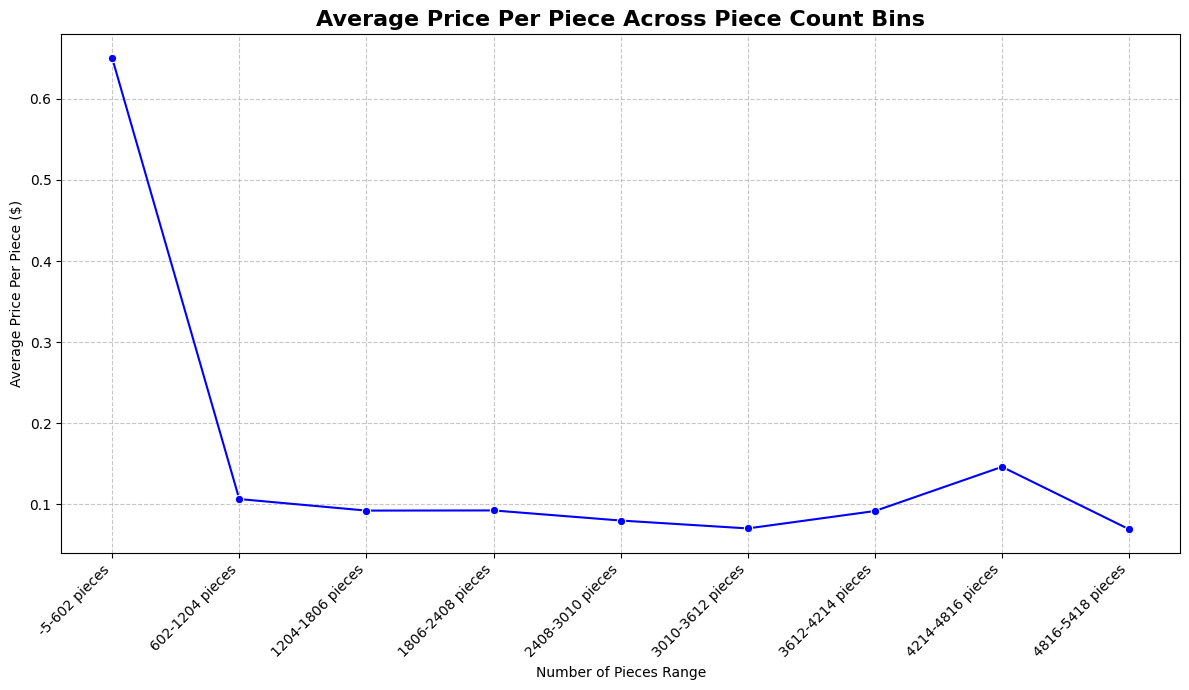

Interpretation: This line plot shows the average price per piece for sets falling into different piece count ranges. The general downward trend indicates that, on average, sets with more pieces tend to have a lower price per piece, confirming the observation from the scatter plot and summary statistics.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Re-create df_clean and price_per_piece for this plot
df_clean = df.dropna(subset=['pieces', 'price'])  # Remove missing values
df_clean = df_clean[(df_clean['pieces'] > 0) & (df_clean['price'] > 0)]  # Remove invalid entries
df_clean['price_per_piece'] = df_clean['price'] / df_clean['pieces']  # Calculate price per piece

# Create bins for 'pieces' to group them into categories
df_clean['piece_bins'] = pd.cut(df_clean['pieces'], bins=10, labels=False)

# Calculate the mean price_per_piece for each bin
binned_avg_price_per_piece = df_clean.groupby('piece_bins')['price_per_piece'].mean().reset_index()

# Get the mid-point of each bin for plotting
bin_labels = []
for i, bin_info in enumerate(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1]):
    if i < len(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1]) - 1:
        bin_start = int(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1][i])
        bin_end = int(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1][i+1])
        bin_labels.append(f'{bin_start}-{bin_end} pieces')

binned_avg_price_per_piece['bin_range'] = bin_labels[:len(binned_avg_price_per_piece)]

plt.figure(figsize=(12, 7))
sns.lineplot(x='bin_range', y='price_per_piece', data=binned_avg_price_per_piece, marker='o', color='blue')
plt.title('Average Price Per Piece Across Piece Count Bins', fontsize=16, fontweight='bold')
plt.xlabel('Number of Pieces Range')
plt.ylabel('Average Price Per Piece ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Interpretation: This line plot shows the average price per piece for sets falling into different piece count ranges. The general downward trend indicates that, on average, sets with more pieces tend to have a lower price per piece, confirming the observation from the scatter plot and summary statistics.")

# 5. How do Small, Medium, and Large sets differ in price and piece count?

In [ ]:
# Step 1: Upload the file (run this cell first)
from google.colab import files
uploaded = files.upload()  # Click "Choose Files" and select your lego_population.csv

Saving lego_population.csv to lego_population (5).csv


In [ ]:
# Step 2: Load & inspect the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename (automatically detects the CSV)
filename = next(iter(uploaded.keys()))
df = pd.read_csv(filename)

# Inspect data
print("Original Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Original Dataset Shape: (1304, 14)

First 5 Rows:
   item_number                set_name    theme  pieces  price  amazon_price  \
0        41916   Extra Dots - Series 2     DOTS   109.0   3.99          3.44   
1        41908   Extra Dots - Series 1     DOTS   109.0   3.99          3.99   
2        11006    Creative Blue Bricks  Classic    52.0   4.99          4.93   
3        11007   Creative Green Bricks  Classic    60.0   4.99          4.93   
4        41901  Funky Animals Bracelet     DOTS    33.0   4.99          4.99   

   year     ages  pages  minifigures  packaging weight  unique_pieces   size  
0  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
1  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
2  2020  Ages_4+   37.0          NaN        Box    NaN           28.0  Small  
3  2020  Ages_4+   37.0          NaN        Box    NaN           36.0  Small  
4  2020  Ages_6+    NaN          NaN  Foil pack    NaN           10.0  Sma

In [ ]:
# Step 3: Clean data
df_clean = df.dropna(subset=['pieces', 'price'])  # Remove missing values
df_clean = df_clean[(df_clean['pieces'] > 0) & (df_clean['price'] > 0)]  # Remove invalid entries
df_clean['price_per_piece'] = df_clean['price'] / df_clean['pieces']  # Calculate price per piece

print(f"\nCleaned Dataset Shape: {df_clean.shape}")


Cleaned Dataset Shape: (1065, 15)


In [ ]:
# Step 4: Categorize sets by size (Small/Medium/Large)
# Define size thresholds using quartiles
piece_quartiles = df_clean['pieces'].quantile([0.33, 0.66]).values
small_threshold = piece_quartiles[0]
large_threshold = piece_quartiles[1]

print(f"\nSize Thresholds (Piece Count):")
print(f"Small: ≤ {small_threshold:.0f} pieces")
print(f"Medium: {small_threshold:.0f} - {large_threshold:.0f} pieces")
print(f"Large: > {large_threshold:.0f} pieces")

# Assign size categories
def categorize_size(pieces):
    if pieces <= small_threshold:
        return 'Small'
    elif pieces <= large_threshold:
        return 'Medium'
    else:
        return 'Large'

df_clean['size'] = df_clean['pieces'].apply(categorize_size)

# Check size distribution
print("\nSize Distribution:")
size_dist = df_clean['size'].value_counts()
print(size_dist)
size_percent = (size_dist / len(df_clean) * 100).round(1)
print("\nPercentage:")
print(size_percent.astype(str) + "%")


Size Thresholds (Piece Count):
Small: ≤ 134 pieces
Medium: 134 - 374 pieces
Large: > 374 pieces

Size Distribution:
size
Large     360
Small     353
Medium    352
Name: count, dtype: int64

Percentage:
size
Large     33.8%
Small     33.1%
Medium    33.1%
Name: count, dtype: object


In [ ]:
# Step 5: Size-based metrics (analysis)
size_metrics = df_clean.groupby('size').agg({
    'pieces': ['mean', 'median'],
    'price': ['mean', 'median'],
    'price_per_piece': ['mean', 'median']
}).round(2)

print("\n=== Key Metrics by Set Size ===")
print(size_metrics)


=== Key Metrics by Set Size ===
        pieces         price        price_per_piece       
          mean median   mean median            mean median
size                                                      
Large   980.22  666.0  95.29  69.99            0.10   0.10
Medium  236.20  225.0  27.19  19.99            0.12   0.10
Small    67.61   69.0  15.54   9.99            1.42   0.17


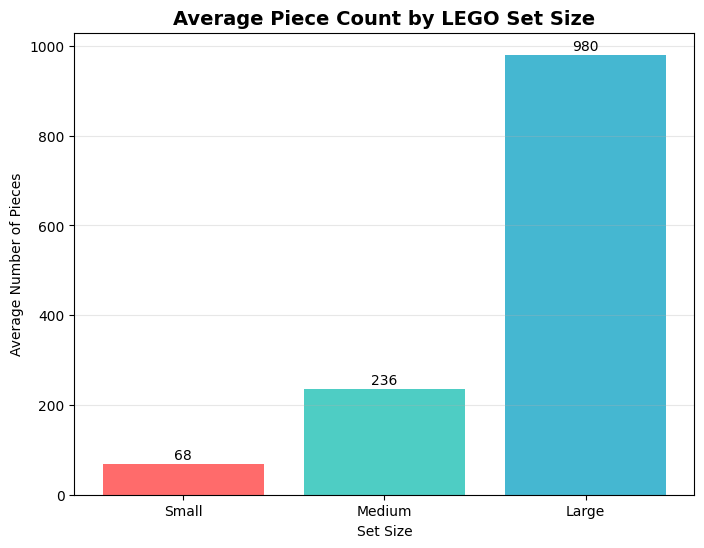

In [ ]:
# Step 6: Visualizations (matches your charts)
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

sorted_sizes = ['Small', 'Medium', 'Large']

# Chart 1: Average Piece Count by Size
plt.figure(figsize=(8, 6))
piece_means = df_clean.groupby('size')['pieces'].mean().reindex(sorted_sizes)
bars = plt.bar(sorted_sizes, piece_means, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Average Piece Count by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Average Number of Pieces')
# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 10,
             f'{piece_means.iloc[i]:.0f}', ha='center')
plt.grid(axis='y', alpha=0.3)
plt.show()

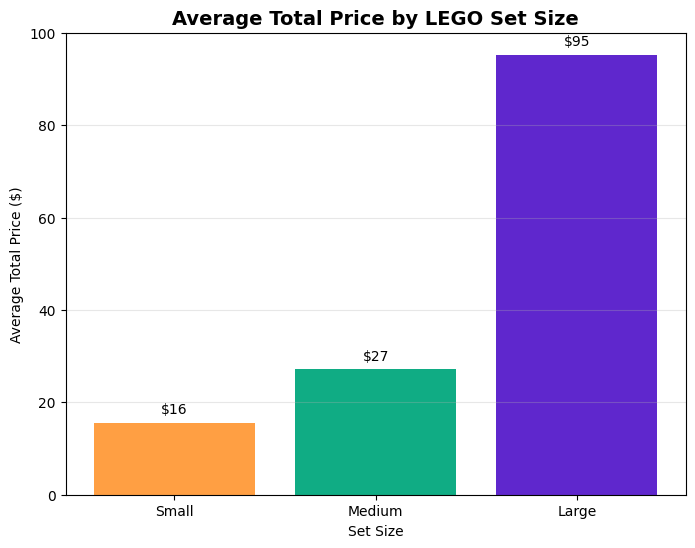

In [ ]:
# Chart 2: Average Total Price by Size
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
price_means = df_clean.groupby('size')['price'].mean().reindex(sorted_sizes)
bars = plt.bar(sorted_sizes, price_means, color=['#FF9F43', '#10AC84', '#5F27CD'])
plt.title('Average Total Price by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Average Total Price ($)')
# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
             f'${price_means.iloc[i]:.0f}', ha='center')
plt.grid(axis='y', alpha=0.3)
plt.show()

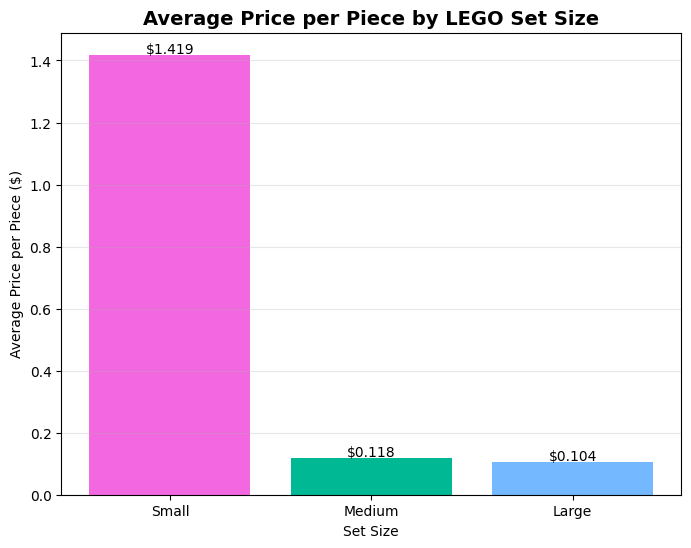

In [ ]:
# Chart 3: Average Price per Piece by Size
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
ppp_means = df_clean.groupby('size')['price_per_piece'].mean().reindex(sorted_sizes)
bars = plt.bar(sorted_sizes, ppp_means, color=['#F368E0', '#00B894', '#74B9FF'])
plt.title('Average Price per Piece by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Average Price per Piece ($)')
# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
             f'${ppp_means.iloc[i]:.3f}', ha='center')
plt.grid(axis='y', alpha=0.3)
plt.show()

/tmp/ipython-input-556023452.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(size_price_data, labels=sorted_sizes, patch_artist=True)


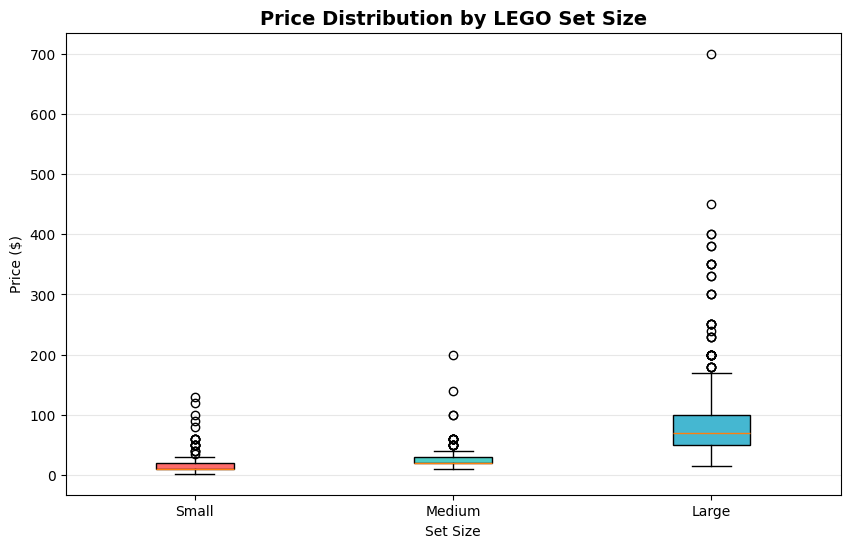

In [ ]:
# Chart 4: Price Distribution by Size (Box Plot)
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
size_price_data = [df_clean[df_clean['size']==s]['price'] for s in sorted_sizes]
boxplot = plt.boxplot(size_price_data, labels=sorted_sizes, patch_artist=True)
# Add colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Price Distribution by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Price ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()